In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

In [3]:
d0 = pd.read_csv('sdBShortP_large_Mdot0_alpha_0.5_ce_applied.csv')
d1 = pd.read_csv('sdBShortP_large_Mdot-1_alpha_0.5_ce_applied.csv')
d2 = pd.read_csv('sdBShortP_large_Mdot-2_alpha_0.5_ce_applied.csv')
d3 = pd.read_csv('sdBShortP_large_Mdot-3_alpha_0.5_ce_applied.csv')

d4 = pd.read_csv('sdBShortP_large_Mdot-1_alpha_0.3_ce_applied.csv')
d5 = pd.read_csv('sdBShortP_large_Mdot-1_alpha_0.7_ce_applied.csv')

label1 = 'Mdot = 0'
label2 = 'Mdot = -1'
label3 = 'Mdot = -2'
label4 = 'Mdot = -3'

label5 = 'Mdot = -1'
label6 = 'Mdot = -1'

In [4]:
# d0 = pd.read_csv('sdBShortP_large_Jdot_0.3_alpha_0.5_ce_applied.csv')
# d1 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_0.5_ce_applied.csv')
# d2 = pd.read_csv('sdBShortP_large_Jdot_30_alpha_0.5_ce_applied.csv')
# d3 = pd.read_csv('sdBShortP_large_Jdot_100_alpha_0.5_ce_applied.csv')

# d4 = pd.read_csv('sdBShortP_large_Jdot_1_alpha_0.5_ce_applied.csv')
# d5 = pd.read_csv('sdBShortP_large_Jdot_10_alpha_0.5_ce_applied.csv')

# label1 = 'Jdot = 0.3'
# label2 = 'Jdot = 3'
# label3 = 'Jdot = 30'
# label4 = 'Jdot = 100'

# label5 = 'Jdot = 1'
# label6 = 'Jdot = 10'

In [5]:
#d0.info(verbose=True)

In [6]:
sel_types = ['sdB']
dsdb0 = d0[d0['product'].isin(sel_types)]
dsdb1 = d1[d1['product'].isin(sel_types)]
dsdb2 = d2[d2['product'].isin(sel_types)]
dsdb3 = d3[d3['product'].isin(sel_types)]

dsdb1a = d4[d4['product'].isin(sel_types)]
dsdb1b = d5[d5['product'].isin(sel_types)]

In [7]:
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.5]
labels = ['0.1', '0.3', '0.5', '0.7', '0.9', '+1.0']

dsdb0['M2_final_bin'] = pd.cut(dsdb0['M2_final'], bins=bins, labels=labels)
dsdb1['M2_final_bin'] = pd.cut(dsdb1['M2_final'], bins=bins, labels=labels)
dsdb2['M2_final_bin'] = pd.cut(dsdb2['M2_final'], bins=bins, labels=labels)
dsdb3['M2_final_bin'] = pd.cut(dsdb3['M2_final'], bins=bins, labels=labels)

dsdb1a['M2_final_bin'] = pd.cut(dsdb1a['M2_final'], bins=bins, labels=labels)
dsdb1b['M2_final_bin'] = pd.cut(dsdb1b['M2_final'], bins=bins, labels=labels)

In [8]:
print(label1)
print(d0[(d0['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label2)
print(d1[(d1['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label3)
print(d2[(d2['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label4)
print(d3[(d3['stability'] == 'CE')]['product'].value_counts(sort=False))

Mdot = 0
He-WD    1678
sdB       247
Name: product, dtype: int64
Mdot = -1
He-WD    1660
HB          9
sdB       266
Name: product, dtype: int64
Mdot = -2
He-WD    2513
HB        349
sdB       300
Name: product, dtype: int64
Mdot = -3
He-WD    5574
HB       1209
sdB       230
Name: product, dtype: int64


# sdB properties

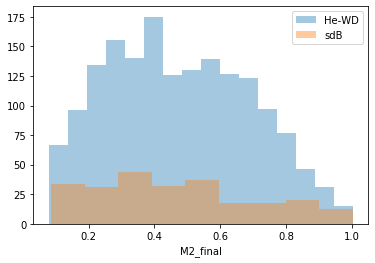

In [9]:
sns.distplot(d0[(d0['stability'] == 'CE') & (d0['product'] == 'He-WD')]['M2_final'], kde=False, label='He-WD')
sns.distplot(d0[(d0['stability'] == 'CE') & (d0['product'] == 'sdB')]['M2_final'], kde=False, label='sdB')
pl.legend()

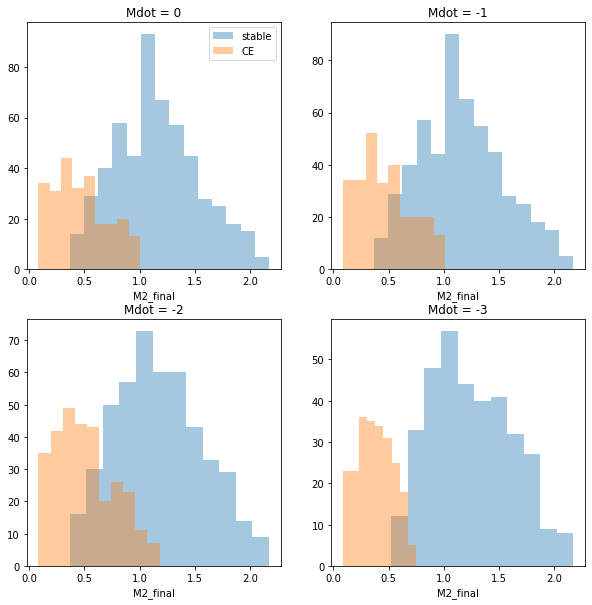

In [10]:
def plot_dist(df):
    sns.distplot(df[df['stability'] == 'stable']['M2_final'], kde=False, label='stable')
    sns.distplot(df[df['stability'] == 'CE']['M2_final'], kde=False, label='CE')

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.legend()
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

No handles with labels found to put in legend.


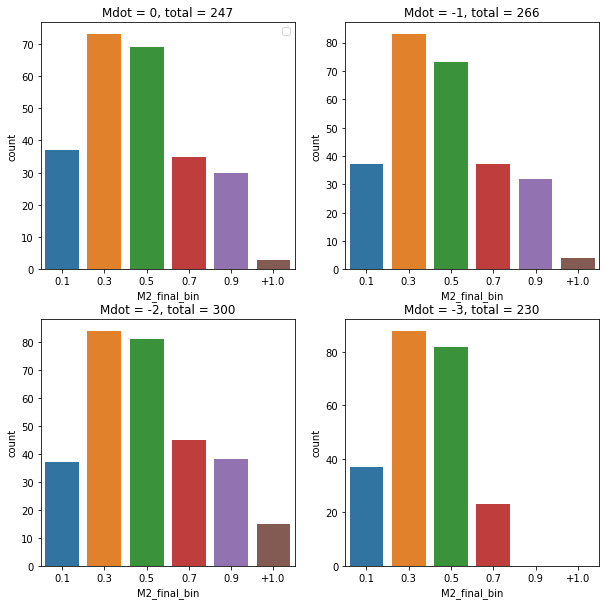

In [11]:
def plot_dist(df):
    sns.countplot('M2_final_bin', data=df[df['stability'] == 'CE'])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.legend()
pl.title(label1 + ', total = {}'.format(len(dsdb0[dsdb0['stability'] == 'CE'])))

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2 + ', total = {}'.format(len(dsdb1[dsdb1['stability'] == 'CE'])))

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3 + ', total = {}'.format(len(dsdb2[dsdb2['stability'] == 'CE'])))

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4 + ', total = {}'.format(len(dsdb3[dsdb3['stability'] == 'CE'])))

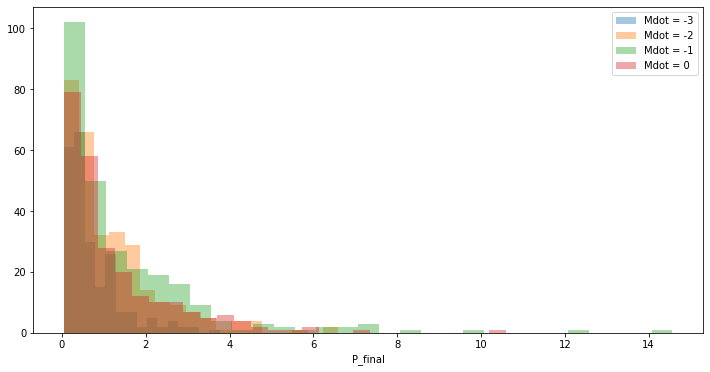

In [12]:
def plot_dist(df, **kwargs):
    sns.distplot(df[(df['stability'] == 'CE')]['P_final'], kde=False, **kwargs)

pl.figure(1, figsize=(12, 6))
plot_dist(dsdb3, label=label4)
plot_dist(dsdb2, label=label3)
plot_dist(dsdb1, label=label2)
plot_dist(dsdb0, label=label1)
pl.legend()


No handles with labels found to put in legend.


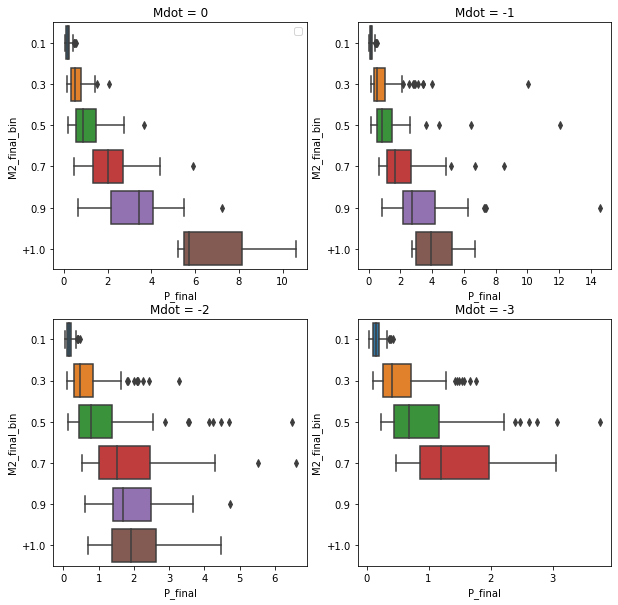

In [13]:
def plot_dist(df):
    sns.boxplot('P_final', 'M2_final_bin', data=df[df['stability'] == 'CE'])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.legend()
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)


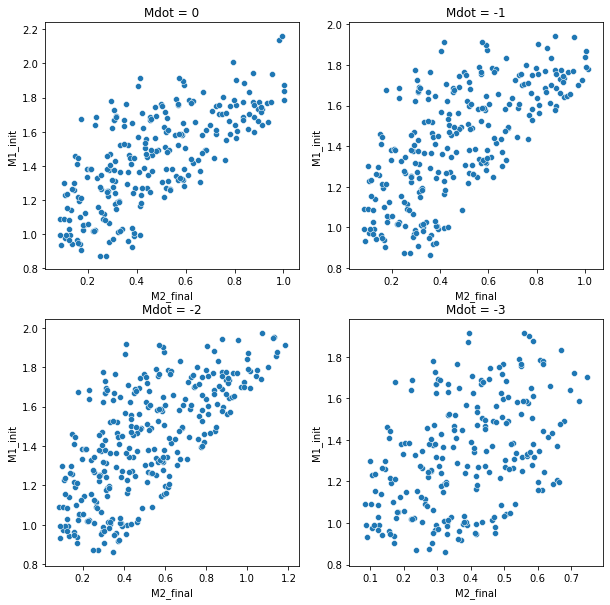

In [14]:
def plot_dist(df):
    sns.scatterplot('M2_final', 'M1_init', data=df[df['stability'] == 'CE'])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

# Dependence on alpha_ce

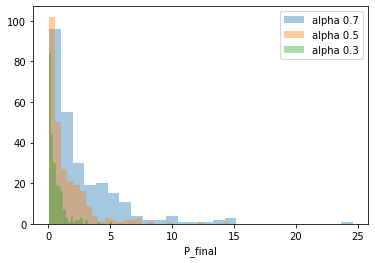

In [15]:
def plot_dist(df, **kwargs):
    sns.distplot(df[(df['stability'] == 'CE')]['P_final'], kde=False, **kwargs)

plot_dist(dsdb1b, label='alpha 0.7')
plot_dist(dsdb1, label='alpha 0.5')
plot_dist(dsdb1a, label='alpha 0.3')
pl.legend()

Text(0.5, 1.0, 'alpha 0.7')

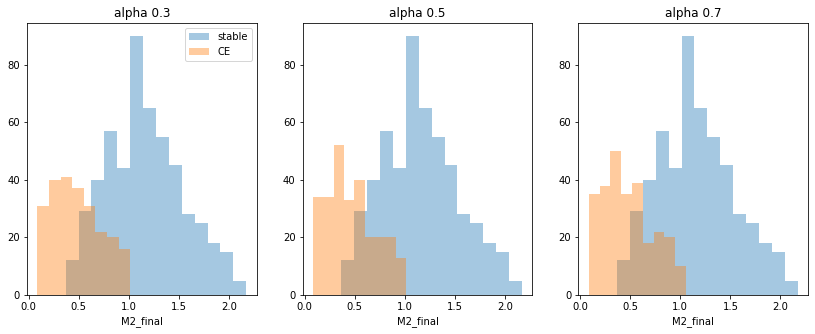

In [16]:
def plot_dist(df):
    sns.distplot(df[df['stability'] == 'stable']['M2_final'], kde=False, label='stable')
    sns.distplot(df[df['stability'] == 'CE']['M2_final'], kde=False, label='CE')

pl.figure(1, figsize=(14, 5))

pl.subplot(131)
plot_dist(dsdb1a)
pl.legend()
pl.title('alpha 0.3')

pl.subplot(132)
plot_dist(dsdb1)
pl.title('alpha 0.5')

pl.subplot(133)
plot_dist(dsdb1b)
pl.title('alpha 0.7')


Text(0.5, 1.0, 'alpha 0.7')

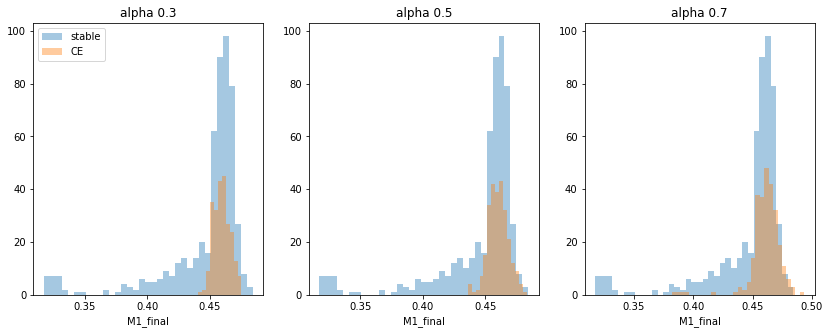

In [17]:
def plot_dist(df):
    sns.distplot(df[df['stability'] == 'stable']['M1_final'], kde=False, label='stable')
    sns.distplot(df[df['stability'] == 'CE']['M1_final'], kde=False, label='CE')

pl.figure(1, figsize=(14, 5))

pl.subplot(131)
plot_dist(dsdb1a)
pl.legend()
pl.title('alpha 0.3')

pl.subplot(132)
plot_dist(dsdb1)
pl.title('alpha 0.5')

pl.subplot(133)
plot_dist(dsdb1b)
pl.title('alpha 0.7')


No handles with labels found to put in legend.


(0.0, 15)

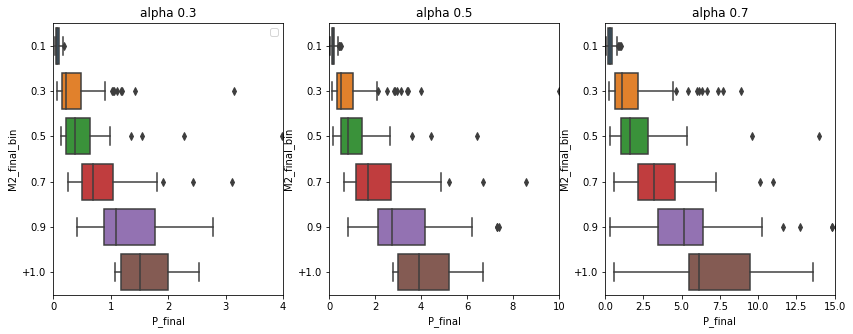

In [18]:
def plot_dist(df):
#     sns.scatterplot('M2_final', 'P_final', data = df[df['stability'] == 'CE'])
    sns.boxplot('P_final', 'M2_final_bin', data=df[df['stability'] == 'CE'])

pl.figure(1, figsize=(14, 5))

pl.subplot(131)
plot_dist(dsdb1a)
pl.legend()
pl.title('alpha 0.3')
pl.xlim([0., 4])

pl.subplot(132)
plot_dist(dsdb1)
pl.title('alpha 0.5')
pl.xlim([0., 10])

pl.subplot(133)
plot_dist(dsdb1b)
pl.title('alpha 0.7')
pl.xlim([0., 15])

Text(0.5, 1.0, 'alpha 0.7')

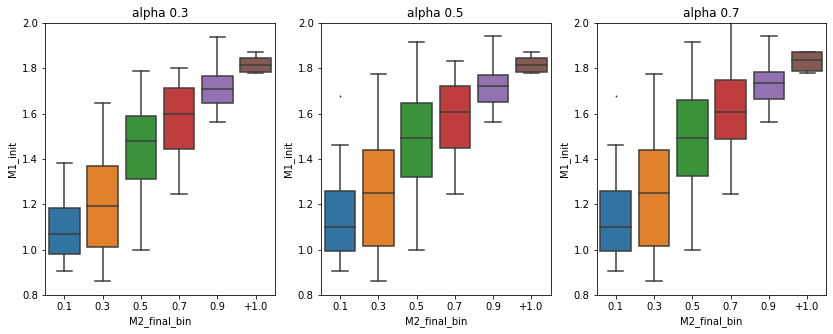

In [19]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'M1_init', data=df[df['stability'] == 'CE'], fliersize=1)
    pl.ylim([0.8, 2.0])

pl.figure(1, figsize=(14, 5))

pl.subplot(131)
plot_dist(dsdb1a)
pl.title('alpha 0.3')

pl.subplot(132)
plot_dist(dsdb1)
pl.title('alpha 0.5')


pl.subplot(133)
plot_dist(dsdb1b)
pl.title('alpha 0.7')

# Relation between primary and companion during sdB phase

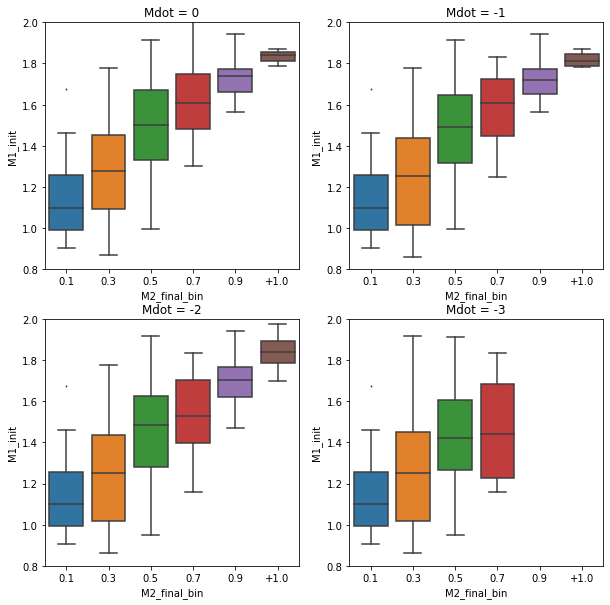

In [20]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'M1_init', data=df[df['stability'] == 'CE'], fliersize=1)
    pl.ylim([0.8, 2.0])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

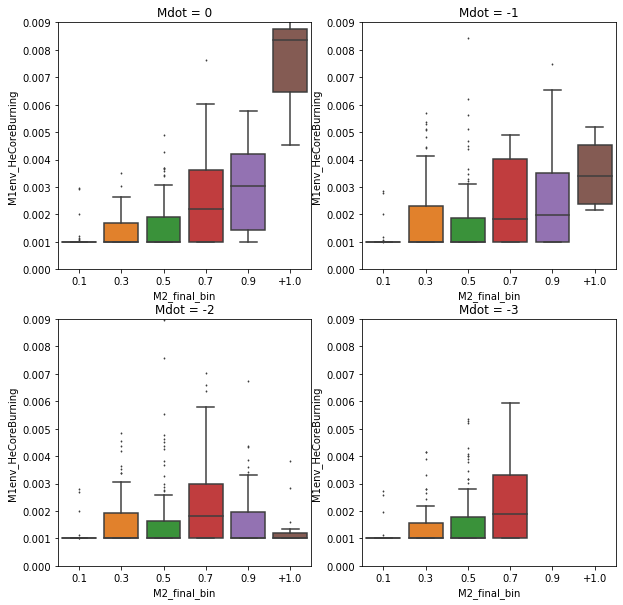

In [21]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'M1env_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1)
    pl.ylim([0, 0.009])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

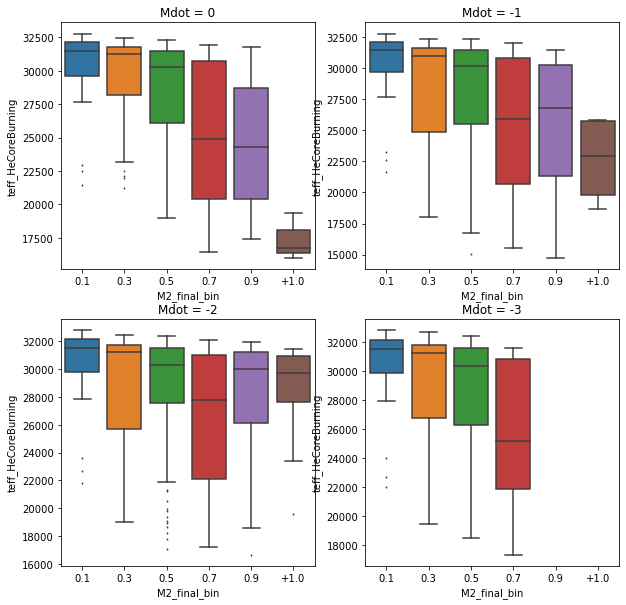

In [22]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'teff_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1)

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

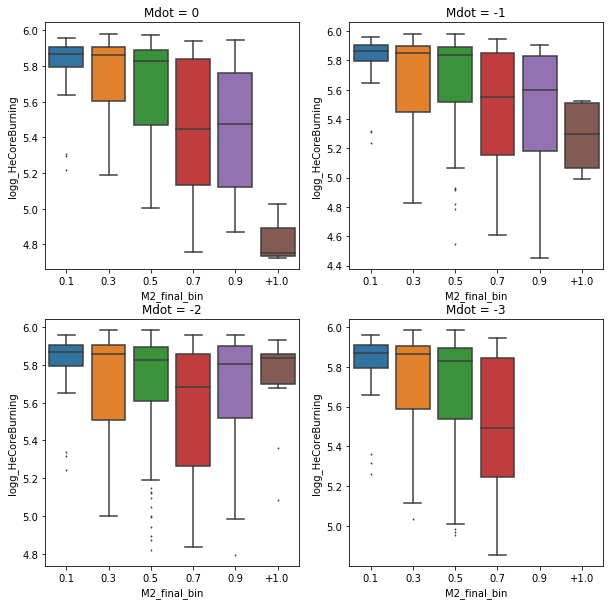

In [23]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'logg_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1)

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)